In [51]:
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
# Read in data
path = './data/GEinParliament.csv'
df = pd.read_csv(path)
df.head()

,COU,Country,IND,Indicator,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,EMPW_PARL,"Gender equality in parliament, percentage of w...",2002,2002,PC,Percentage,0,Units,NaN,NaN,25.3,NaN,NaN
1,AUS,Australia,EMPW_PARL,"Gender equality in parliament, percentage of w...",2012,2012,PC,Percentage,0,Units,NaN,NaN,24.7,NaN,NaN
2,AUS,Australia,EMPW_PARL,"Gender equality in parliament, percentage of w...",2015,2015,PC,Percentage,0,Units,NaN,NaN,26.7,NaN,NaN
3,AUS,Australia,EMPW_PARL,"Gender equality in parliament, percentage of w...",2017,2017,PC,Percentage,0,Units,NaN,NaN,28.7,NaN,NaN
4,AUS,Australia,EMPW_PARL,"Gender equality in parliament, percentage of w...",2019,2019,PC,Percentage,0,Units,NaN,NaN,30.0,NaN,NaN


In [53]:
# Show latest data ranked by country 

# Get most recent data by filtering on year == 2019
is_2019 = df['Year'] == 2019
latest_df = df[is_2019]

# Sort by Value so the graph looks meaningful 
latest_df.sort_values(by=['Value'], inplace=True)
latest_df.head()

<ipython-input-53-db514b1ec1f7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_df.sort_values(by=['Value'], inplace=True)


,COU,Country,IND,Indicator,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
74,JPN,Japan,EMPW_PARL,"Gender equality in parliament, percentage of w...",2019,2019,PC,Percentage,0,Units,NaN,NaN,10.2,NaN,NaN
54,HUN,Hungary,EMPW_PARL,"Gender equality in parliament, percentage of w...",2019,2019,PC,Percentage,0,Units,NaN,NaN,12.6,NaN,NaN
79,KOR,Korea,EMPW_PARL,"Gender equality in parliament, percentage of w...",2019,2019,PC,Percentage,0,Units,NaN,NaN,17.1,NaN,NaN
138,TUR,Turkey,EMPW_PARL,"Gender equality in parliament, percentage of w...",2019,2019,PC,Percentage,0,Units,NaN,NaN,17.4,NaN,NaN
158,COL,Colombia,EMPW_PARL,"Gender equality in parliament, percentage of w...",2019,2019,PC,Percentage,0,Units,NaN,NaN,18.1,NaN,NaN


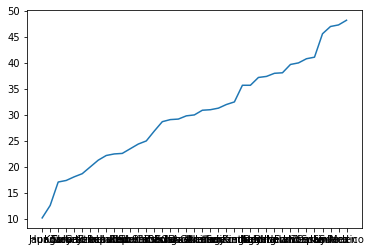

In [54]:
country = latest_df['Country'].tolist()
perc = latest_df['Value'].tolist()

plt.plot(country, perc)
plt.show()

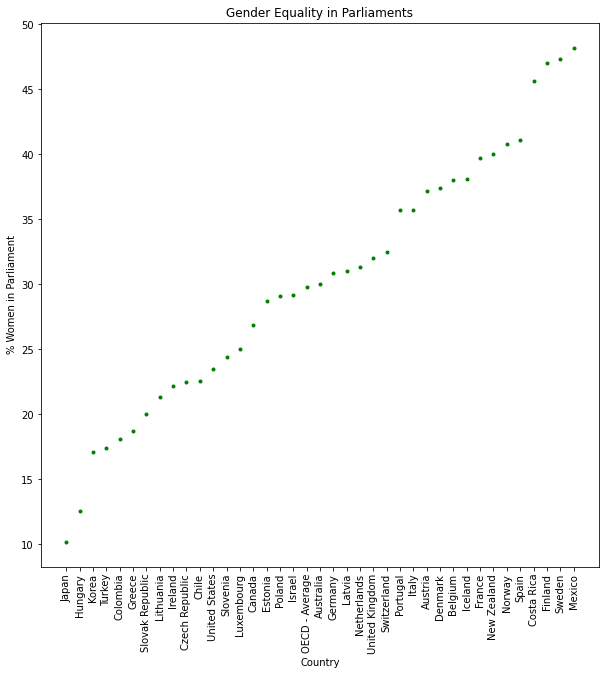

In [55]:
# Trying out silly formatting
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(country, perc, 'og', ms=3)
plt.title('Gender Equality in Parliaments')
plt.xlabel('Country')
plt.ylabel('% Women in Parliament')
# Makes x-axis names vertical so they don't all overlap 
plt.xticks(rotation=90)
plt.savefig('plots/GEbyCountry')
plt.show()

<Figure size 432x288 with 0 Axes>

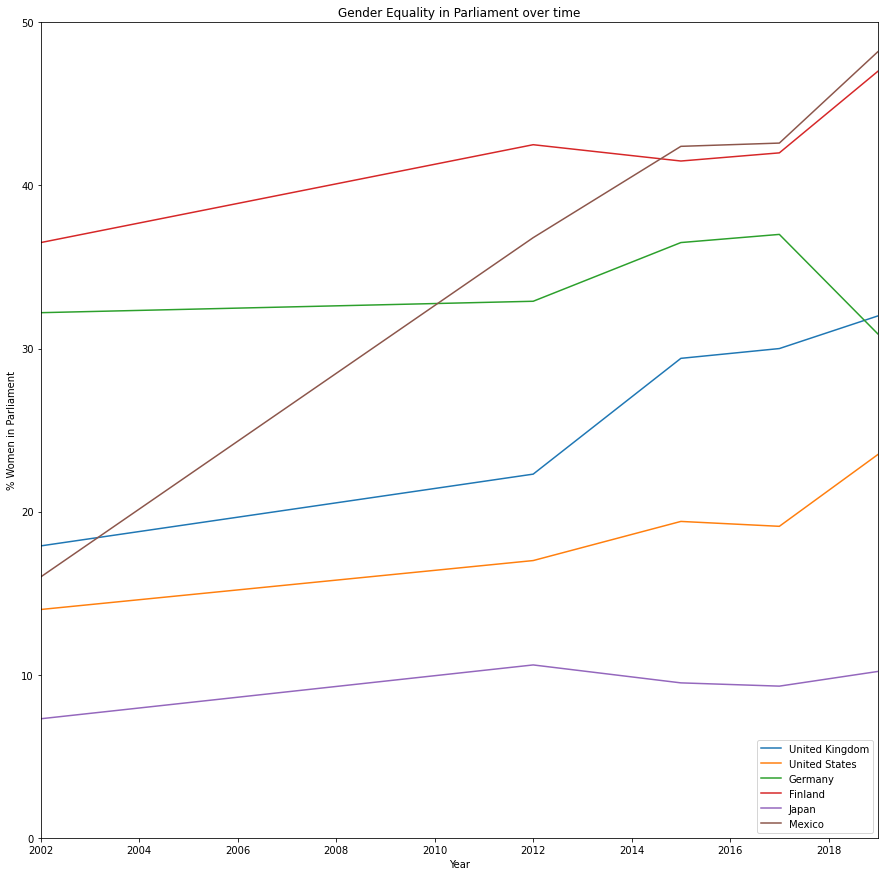

In [58]:
# Show change in % by country over time 
fig, ax = plt.subplots(figsize=(15,15))
ax.set(xlim=(2002,2019), ylim=(0,50))

all_countries = df['Country'].tolist()
countries = list(set(all_countries))
# print('All countries: ', all_countries)

# Pick random smaller sample to display
countries = ['United Kingdom', 'United States', 'Germany', 'Finland', 'Japan', 'Mexico']

# Add plot for all 
lgnd=[]
for c in countries:
    is_country = df['Country'] == c
    filt_df = df[is_country]
    years = filt_df['Year'].tolist()
    values = filt_df['Value'].tolist()
    plt.plot(years, values)
    lgnd.append(c)

# Formatting
plt.title('Gender Equality in Parliament over time')
plt.xlabel('Year')
plt.ylabel('% Women in Parliament')
plt.legend(lgnd, loc='lower right') # upper left
plt.savefig('plots/GEoverTime')
plt.show()